# Spectral analysis

https://astronn.readthedocs.io/en/latest/neuralnets/apogee_cvae.html


Try to use astroNN

In [1]:
from astroNN.models import ApogeeCVAE
from astroNN.datasets import H5Loader
import h5py
from sklearn.model_selection import train_test_split
import numpy as np

2023-04-13 20:14:54.337686: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

from matplotlib.backends.backend_pdf import PdfPages

%matplotlib inline

In [3]:
with h5py.File('SLspectra.hdf5', 'r') as hf:
    data_in = hf['flambda'][:]
    wl_in = hf['wl'][:]

In [4]:
data_in.shape

(550, 10000)

In [5]:
x_train,x_test=train_test_split(data_in,test_size=0.33, random_state=42)

In [6]:
y_train = np.random.randint(2, size=x_train.shape[0])
y_test = np.random.randint(2, size=x_test.shape[0])

In [7]:
# And then create an object of Bayesian Convolutional Neural Network classs
cvae_net = ApogeeCVAE()

# Set max_epochs to 10 for a quick result. You should train more epochs normally, especially with dropout
cvae_net.max_epochs = 10


In [8]:
cvae_net.train(x_train,y_train)

/var/folders/rk/cnrspsj13_3cgmh8p4m_mxww0000gp/T/ipykernel_92558/1617019894.py:1: UserWarning: Call to function train() is deprecated and will be removed in future. Use fit() instead.


Number of Training Data: 332, Number of Validation Data: 36
====Message from Normalizer====
You selected mode: 2
Featurewise Center: {'input': True}
Datawise Center: {'input': False} 
Featurewise std Center: {'input': True}
Datawise std Center: {'input': False} 
====Message ends====
====Message from Normalizer====
You selected mode: 2
Featurewise Center: {'output': True}
Datawise Center: {'output': False} 
Featurewise std Center: {'output': True}
Datawise std Center: {'output': False} 
====Message ends====
Epoch 1/10


2023-04-13 20:15:08.206690: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-04-13 20:15:13.851311: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


5/5 - 11s - loss: 56326028.0000 - reconstruction_loss: 56321784.0000 - kl_loss: 4241.0850 - val_loss: 145462.6875 - val_reconstruction_loss: 145457.5000 - val_kl_loss: 5.1847 - lr: 5.0000e-04 - 11s/epoch - 2s/step
Epoch 2/10
5/5 - 7s - loss: 1427546.7500 - reconstruction_loss: 1427517.7500 - kl_loss: 28.9766 - val_loss: 133709.0625 - val_reconstruction_loss: 133701.3594 - val_kl_loss: 7.7004 - lr: 5.0000e-04 - 7s/epoch - 1s/step
Epoch 3/10
5/5 - 7s - loss: 991264.1875 - reconstruction_loss: 991233.8125 - kl_loss: 30.3606 - val_loss: 74064.9766 - val_reconstruction_loss: 74057.5234 - val_kl_loss: 7.4570 - lr: 5.0000e-04 - 7s/epoch - 1s/step
Epoch 4/10
5/5 - 7s - loss: 980714.6875 - reconstruction_loss: 980681.6250 - kl_loss: 33.1212 - val_loss: 35672.0625 - val_reconstruction_loss: 35665.1992 - val_kl_loss: 6.8644 - lr: 5.0000e-04 - 7s/epoch - 1s/step
Epoch 5/10
5/5 - 7s - loss: 853375.0000 - reconstruction_loss: 853344.5000 - kl_loss: 30.5387 - val_loss: 30518.9258 - val_reconstruction

In [9]:
# Get latent space representation
latent_space_value = cvae_net.test_encoder(x_test)[0]

/var/folders/rk/cnrspsj13_3cgmh8p4m_mxww0000gp/T/ipykernel_92558/1917556474.py:2: UserWarning: Call to function test_encoder() is deprecated and will be removed in future. Use predict_encoder() instead.
Prediction progress:   0%|                                                                                                                          | 0/182 [00:00<?, ?sample/s]2023-04-13 20:16:22.475694: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
Prediction progress: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 182/182 [00:00<00:00, 357.50sample/s]


In [10]:
latent_space_value

array([[-2.02482507e-01, -6.12958848e-01],
       [-7.83507645e-01, -1.49024856e+00],
       [-1.99780278e-02,  1.76896662e-01],
       [-1.10787965e-01, -2.44429603e-01],
       [-1.31605789e-01, -2.71997094e-01],
       [-1.02430975e+00, -1.72023284e+00],
       [-1.18265617e+00, -1.92975986e+00],
       [-1.43135473e-01, -1.70968115e-01],
       [ 6.90654442e-02, -1.52117051e-02],
       [-4.62272912e-01, -1.46754539e+00],
       [-6.18778288e-01,  1.92080438e-01],
       [-1.14474082e+00, -1.89506423e+00],
       [-4.90256518e-01, -3.62721324e-01],
       [-9.26965177e-01, -1.77342260e+00],
       [-1.75423935e-01, -2.24309802e-01],
       [-3.18078607e-01, -1.65105730e-01],
       [-1.33896694e-01, -1.47395790e-01],
       [-1.76578104e-01, -1.71196498e-02],
       [-9.56277311e-01, -1.56010187e+00],
       [-7.85042822e-01, -1.53019321e+00],
       [ 1.38434842e-01, -4.15375121e-02],
       [-7.50811875e-01, -1.09925401e+00],
       [-5.75028181e-01, -1.02502286e+00],
       [-1.

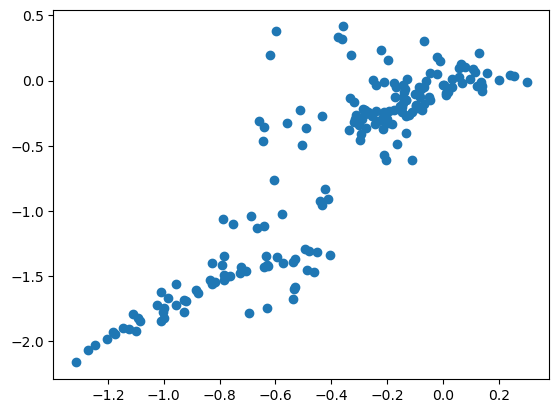

In [11]:
plt.scatter(latent_space_value[:,0],latent_space_value[:,1])
plt.show()

In [12]:
# Get spectra reconstruction
spectra_recon = cvae_net.predict(x_test)


Prediction progress:   0%|                                                                                                                          | 0/182 [00:00<?, ?sample/s]2023-04-13 20:16:23.290191: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
Prediction progress: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 182/182 [00:00<00:00, 462.27sample/s]2023-04-13 20:16:23.674543: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}

ValueError: could not broadcast input array from shape (182,10000,1) into shape (182,1,1)